# MWE: Hard-thresholding filtering

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.utilities.utilstf import get_spectrogram
from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.Benchmark import Benchmark
from src.methods.method_hard_threshold import hard_thresholding
from src.methods.method_garrote_threshold import garrote_thresholding

In [2]:
# Define signal
SNRin = 10
N = 2**13
sbank = SignalBank(N=N,return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_synthetic_mixture_3()
# import librosa
# s, fs = librosa.load(librosa.ex('trumpet'), duration=1.5, sr=8000)
# s = s[0:N]
# WN
noise = np.random.randn(N,)
# PN
# noise = voss(N)

signal = Benchmark.sigmerge(s,noise,SNRin)

In [3]:
output_dict = hard_thresholding(signal, coeff=3.0, Nfft=2*2**13, dict_output=True)
# output_dict = garrote_thresholding(signal, coeff=3.0, Nfft=Nfft, dict_output=True)
signal_output, mask, stft = (i for i in output_dict.values())

Output SNR = 22.322604683189663 (dB)


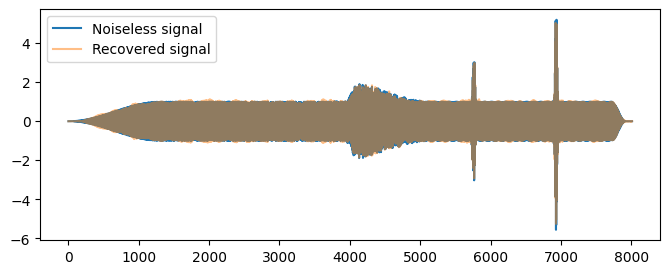

In [4]:
# Compare with the original, noiseless, signal.
print('Output SNR = {} (dB)'.format(Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax)))

plt.figure(figsize=(8,3))
plt.plot(s[tmin:tmax],label='Noiseless signal')
plt.plot(signal_output[tmin:tmax],alpha=0.5,label='Recovered signal')
plt.legend()


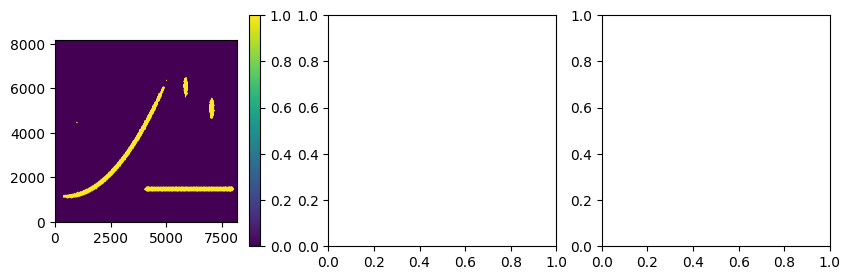

In [5]:
# Spectrograms
# S_output, F_output = get_spectrogram(signal_output)
# F_output = F_output[0:N+1]

fig, axs = plt.subplots(1,3, figsize = (10,3))
# [ax.axis('off') for ax in axs]
im = axs[0].imshow(abs(mask), origin='lower')
plt.colorbar(im, ax=axs[0])
# axs[0].set_title('Input Signal')
# axs[1].imshow(abs(F_output), origin='lower')
# axs[1].set_title('Output Signal')
# axs[2].imshow(abs(F_output-F), origin='lower')
# axs[2].set_title('Difference')
# plt.show()

